In [1]:
 # Implement a linear regression model for the given data to predict the total cost for health care

In [2]:

# importing libraries: 
# numpy- used for working with arrays and matrices
# pandas- used for data manipulation and analysis
# matplotlib- used for dat visualizaation
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
#loading given data from CSV file
df = pd.read_csv('linear_regression_dataset.csv')
df.head() # this command displays the first n rows from the loaded dataset. the default value is 5

,AGE,FEMALE,LOS,RACE,TOTCHG,APRDRG
0,17,1,2,1.0,2660,560
1,17,0,2,1.0,1689,753
2,17,1,7,1.0,20060,930
3,17,1,1,1.0,736,758
4,17,1,1,1.0,1194,754


In [4]:
# checking for any missing values in the data set to get rid of unnecessary training examples
# df['your column name'].isnull().values.any() : this command checks for any nan values in the data frame.
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
print(rows_with_NaN)

     AGE  FEMALE  LOS  RACE  TOTCHG  APRDRG
276    0       1    2   NaN    1156     640


In [5]:
# removing the training example with NaN values to avoid any unnecessary complications
df = df.drop(276)
df

,AGE,FEMALE,LOS,RACE,TOTCHG,APRDRG
0,17,1,2,1.0,2660,560
1,17,0,2,1.0,1689,753
2,17,1,7,1.0,20060,930
3,17,1,1,1.0,736,758
4,17,1,1,1.0,1194,754
...,...,...,...,...,...,...
495,0,1,6,1.0,5881,636
496,0,1,2,1.0,1171,640
497,0,1,2,1.0,1171,640
498,0,1,2,1.0,1086,640


In [6]:
# manipulating dataframe for easier calculations - moving coloumn TOTCHG from coloumn 5 to 6
df = df[["AGE","FEMALE","LOS","RACE","APRDRG","TOTCHG"]]
print(df)

     AGE  FEMALE  LOS  RACE  APRDRG  TOTCHG
0     17       1    2   1.0     560    2660
1     17       0    2   1.0     753    1689
2     17       1    7   1.0     930   20060
3     17       1    1   1.0     758     736
4     17       1    1   1.0     754    1194
..   ...     ...  ...   ...     ...     ...
495    0       1    6   1.0     636    5881
496    0       1    2   1.0     640    1171
497    0       1    2   1.0     640    1171
498    0       1    2   1.0     640    1086
499    0       0    4   1.0     640    4931

[499 rows x 6 columns]


In [7]:
# ouput value = TOTCHG - dependent variable
# input values = AGE,FEMALE,LOS,RACE,APRDRG -independent variables

# seperating input and output values and finding the number of training values(m)
X = df.values[:,0:5]
y = df.values[:,5]
m = len(y) 
print('Total no of training examples (m) = %s \n' %(m))

# show only 5 records
for i in range(5):
    print('X=',X[i, ], ',y =',y[i])

Total no of training examples (m) = 499 

X= [ 17.   1.   2.   1. 560.] ,y = 2660.0
X= [ 17.   0.   2.   1. 753.] ,y = 1689.0
X= [ 17.   1.   7.   1. 930.] ,y = 20060.0
X= [ 17.   1.   1.   1. 758.] ,y = 736.0
X= [ 17.   1.   1.   1. 754.] ,y = 1194.0


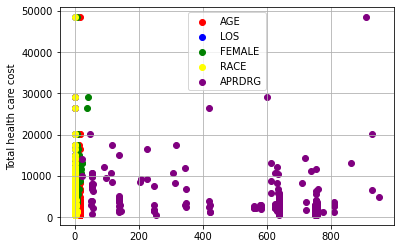

In [8]:
# interpretation and visualization of data

plt.scatter(X[:,0], y, color='red', label ='AGE')
plt.scatter(X[:,1], y, color='blue', label ='LOS')
plt.scatter(X[:,2], y, color='green', label ='FEMALE')
plt.scatter(X[:,3], y, color='yellow', label ='RACE')
plt.scatter(X[:,4], y, color='purple', label ='APRDRG')
plt.ylabel("Total health care cost")
plt.rcParams["figure.figsize"] = (30,20)
plt.grid()
plt.legend()

In [9]:
# from the above graph the following relations can be deduced
# AGE: linear relation
# LOS: linear relation
# FEMALE: linear relation
# RACE: linear relation
# APRDRG: quadratic relation
# from the above conclusions we require a multi variate polynomial hypothesis to fit our data
# for a polynomial plot we require more features, hence creating a new dataset with required features and importing the data.
df_poly = pd.read_csv('linear_regression_dataset (1).csv')
df_poly.head()

,AGE,FEMALE,LOS,RACE,TOTCHG,APRDRG,APRDRGsq
0,17,1,2,1.0,2660,560,313600
1,17,0,2,1.0,1689,753,567009
2,17,1,7,1.0,20060,930,864900
3,17,1,1,1.0,736,758,574564
4,17,1,1,1.0,1194,754,568516


In [10]:
# removing the training example with NaN values to avoid any unnecessary complications
df_poly = df_poly.drop(276)
df_poly

,AGE,FEMALE,LOS,RACE,TOTCHG,APRDRG,APRDRGsq
0,17,1,2,1.0,2660,560,313600
1,17,0,2,1.0,1689,753,567009
2,17,1,7,1.0,20060,930,864900
3,17,1,1,1.0,736,758,574564
4,17,1,1,1.0,1194,754,568516
...,...,...,...,...,...,...,...
495,0,1,6,1.0,5881,636,404496
496,0,1,2,1.0,1171,640,409600
497,0,1,2,1.0,1171,640,409600
498,0,1,2,1.0,1086,640,409600


In [11]:
# manipulating dataframe for easier calculations - moving coloumn TOTCHG from coloumn 5 to 6 (indexing from 0)
df_poly = df_poly[["AGE","LOS","FEMALE","RACE","APRDRG","APRDRGsq","TOTCHG"]]
df_poly

,AGE,LOS,FEMALE,RACE,APRDRG,APRDRGsq,TOTCHG
0,17,2,1,1.0,560,313600,2660
1,17,2,0,1.0,753,567009,1689
2,17,7,1,1.0,930,864900,20060
3,17,1,1,1.0,758,574564,736
4,17,1,1,1.0,754,568516,1194
...,...,...,...,...,...,...,...
495,0,6,1,1.0,636,404496,5881
496,0,2,1,1.0,640,409600,1171
497,0,2,1,1.0,640,409600,1171
498,0,2,1,1.0,640,409600,1086


In [12]:
# ouput value = TOTCHG - dependent variable
# input values = AGE,FEMALE,LOS,RACE,APRDRG,APRDRGsq -independent variables

# seperating input and output values and finding the number of training values(m)
X = df_poly.values[:,0:6]
y = df_poly.values[:,6]
m = len(y) 
print('Total no of training examples (m) = %s \n' %(m))
X = X.astype(int)
y = y.astype(int)

# show only 5 records
for i in range(5):
    print('X=',X[i, ], ',y =',y[i])

Total no of training examples (m) = 499 

X= [    17      2      1      1    560 313600] ,y = 2660
X= [    17      2      0      1    753 567009] ,y = 1689
X= [    17      7      1      1    930 864900] ,y = 20060
X= [    17      1      1      1    758 574564] ,y = 736
X= [    17      1      1      1    754 568516] ,y = 1194


In [13]:
def feature_normalize(X):
    """
     Normalizes the features / input variables in X.
     
     Parameters
     ----------
     X : n dimensional array (matrix)
         Features (input variables) to be normalized.
         
     Returns
     -------
     X_norm : n dimensional array (matrix)
              a normalized version of X.
     mu : n dimensional array(matrix),
          the mean value.
     sigma : n dimensional array (matrix)
             the standard deviation/range.
    """
    # since we need the mean of individual column here, hence axis = 0
    mu = np.mean(X, axis = 0)
    # the parameter ddof (Delta Degrees of Freedom) values is 1.
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu)/sigma
    return X_norm, mu, sigma

In [14]:
X, mu, sigma = feature_normalize(X)

print('mu= ',mu)
print('sigma= ',sigma)
print('X_norm=\n',X[:5])

mu=  [5.09619238e+00 2.82965932e+00 5.11022044e-01 1.07815631e+00
 6.16312625e+02 4.11636741e+05]
sigma=  [6.94573625e+00 3.36328194e+00 4.99878500e-01 5.14230175e-01
 1.78312898e+02 1.59984876e+05]
X_norm=
 [[ 1.71382949 -0.24668147  0.97819361 -0.15198702 -0.31580792 -0.61278756]
 [ 1.71382949 -0.24668147 -1.02229251 -0.15198702  0.7665591   0.97116842]
 [ 1.71382949  1.23996167  0.97819361 -0.15198702  1.75919622  2.83316318]
 [ 1.71382949 -0.54401009  0.97819361 -0.15198702  0.7945997   1.01839163]
 [ 1.71382949 -0.54401009  0.97819361 -0.15198702  0.77216722  0.98058806]]


In [15]:
# adding a column of ones to X feature. 
# this will be our final matrix (feature matrix)
X = np.hstack((np.ones((m,1)),X))
X[:5]

array([[ 1.        ,  1.71382949, -0.24668147,  0.97819361, -0.15198702,
        -0.31580792, -0.61278756],
       [ 1.        ,  1.71382949, -0.24668147, -1.02229251, -0.15198702,
         0.7665591 ,  0.97116842],
       [ 1.        ,  1.71382949,  1.23996167,  0.97819361, -0.15198702,
         1.75919622,  2.83316318],
       [ 1.        ,  1.71382949, -0.54401009,  0.97819361, -0.15198702,
         0.7945997 ,  1.01839163],
       [ 1.        ,  1.71382949, -0.54401009,  0.97819361, -0.15198702,
         0.77216722,  0.98058806]])

In [16]:
def compute_cost(X, y, theta):

    predictions = X.dot(theta)
    # print ('prediction= ',predictions)
    errors = np.subtract(predictions,y)
    # print('errors= ', errors)
    sqrErrors = np.square(errors)
    # print('sqrError= ',sqrErrors)
    J = 1/(2*m)*np.sum(sqrErrors)
    
    return J

In [17]:
def gradient_descent(X, y, theta, alpha, iterations):
    """
    Compute cost for linear regression.
    
    Input parameters
    ----------------
    X : 2D array where each row represents the training example and each column represents the features ndarray. 
        Dimension(m x n)
        m = number of training of training examples
        n = number of features (including column of 1s)
    y : 1D array of labels/target value for each training example. dimension(m x 1)
    theta : 1D array of fitting parameters. Dimension (1 x n)
    alpha : Learning rate, scalar value
    iterations : No of iterations. Scalar value.
    
    Output Parameters
    -----------------
    theta : final value. 1D array of fitting parameters. Dimensions (1 x n)
    cost_history : contains value of cost for each iteration. 1D array. Dimensions(m x 1)
    """
    # initialising cost_history 
    cost_history = np.zeros(iterations)
    
    for i in range(iterations):
        # print('theta= ',theta)
        predictions = X.dot(theta)
        # print('predictions= ',predictions)
        errors = np.subtract(predictions,y)
        # print('errors =',errors)
        sum_delta = (alpha/m)*X.transpose().dot(errors)
        # print('sum_delta =',sum_delta)
        theta = np.subtract(theta,sum_delta)
        
        cost_history[i] = compute_cost(X, y, theta)
        
    return theta, cost_history

In [18]:
# we need theta parameter for every input variable. hence initializing the array
theta = np.zeros(7)
iterations = 400;
alpha = 0.001;
print(theta)

[0. 0. 0. 0. 0. 0. 0.]


In [19]:
theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)
print('Final value of theta =\n ', theta)
print('First 5 values from cost_history =', cost_history[:5])
print('Last 5 values from cost_history =', cost_history[-5:])

Final value of theta =
  [ 916.1019383   208.45679042  802.17378615  -57.04178214  -26.85703454
 -374.97152049 -266.81988444]
First 5 values from cost_history = [11398309.7251973  11381812.44909712 11365352.03042439 11348928.37627525
 11332541.39401985]
Last 5 values from cost_history = [7017910.81702818 7010816.51022837 7003736.79217966 6996671.63077966
 6989620.9940048 ]


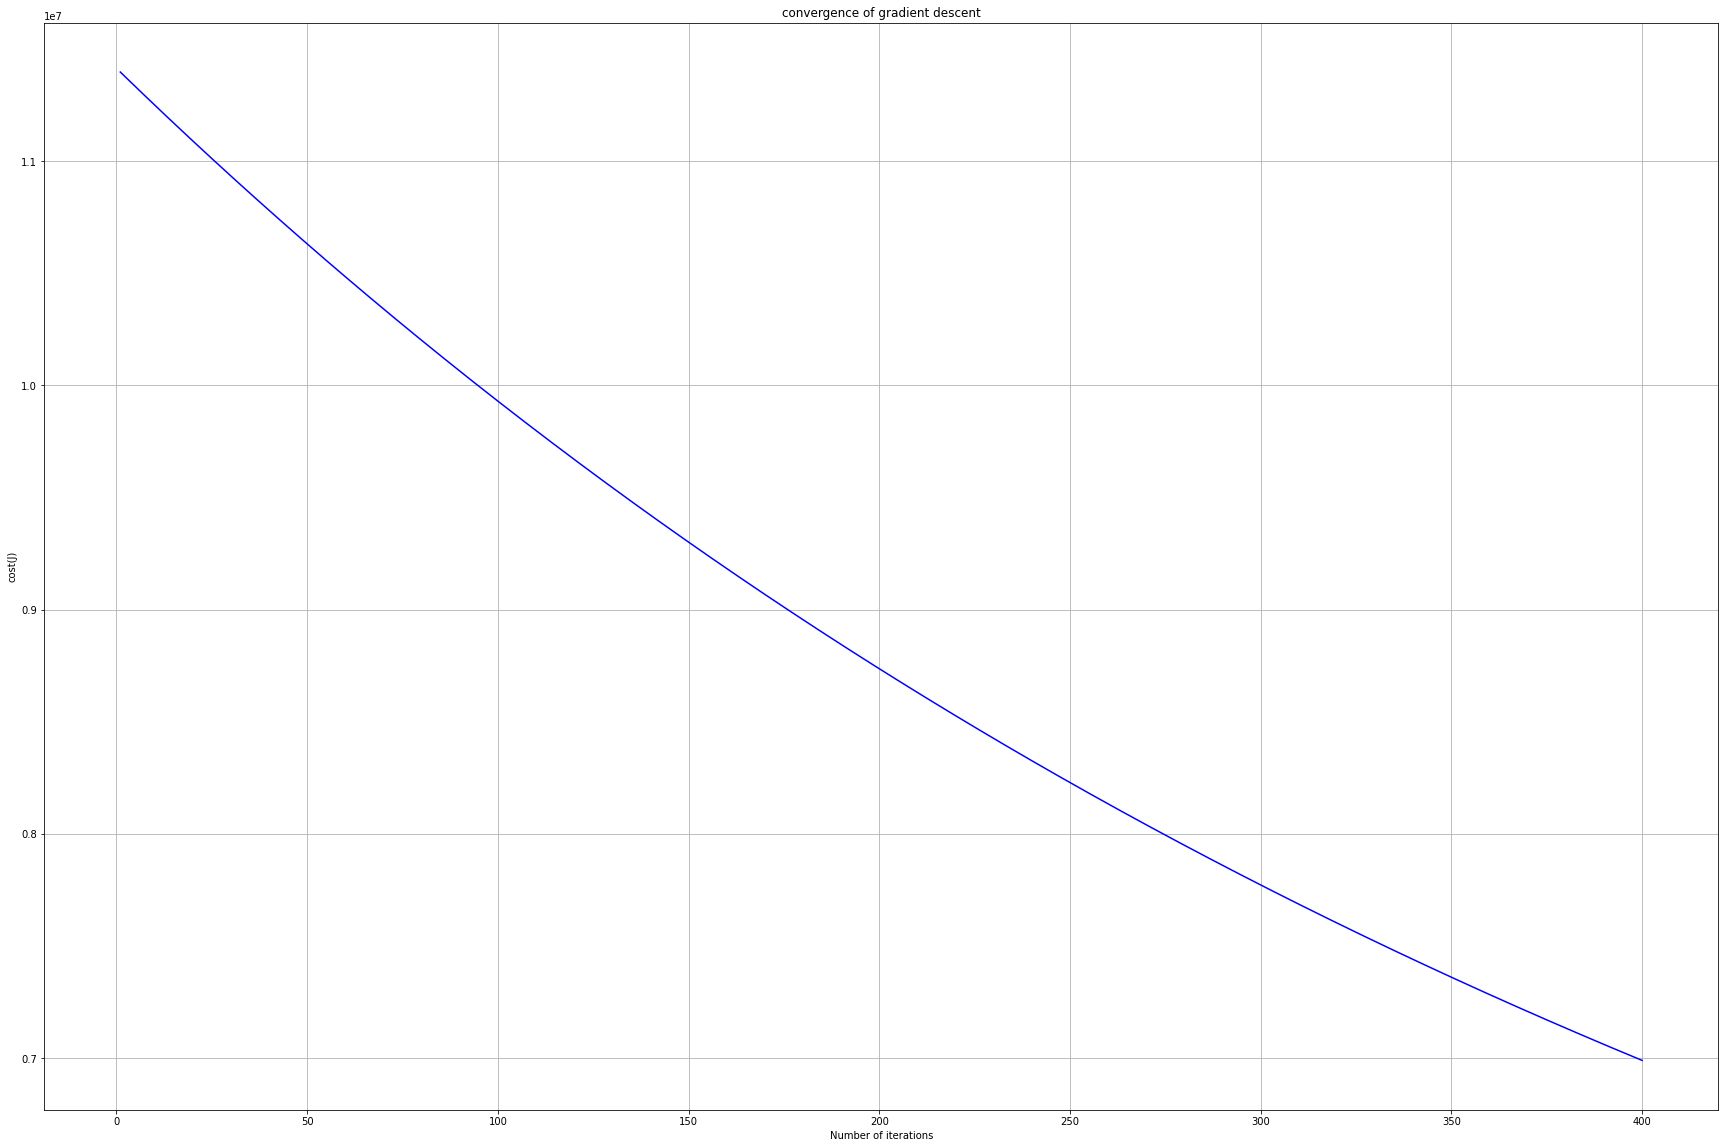

In [20]:
# visualization
plt.plot(range(1,iterations +1), cost_history,color='blue')
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("cost(J)")
plt.title("convergence of gradient descent")
plt.rcParams["figure.figsize"] = (10,10)
plt.show()

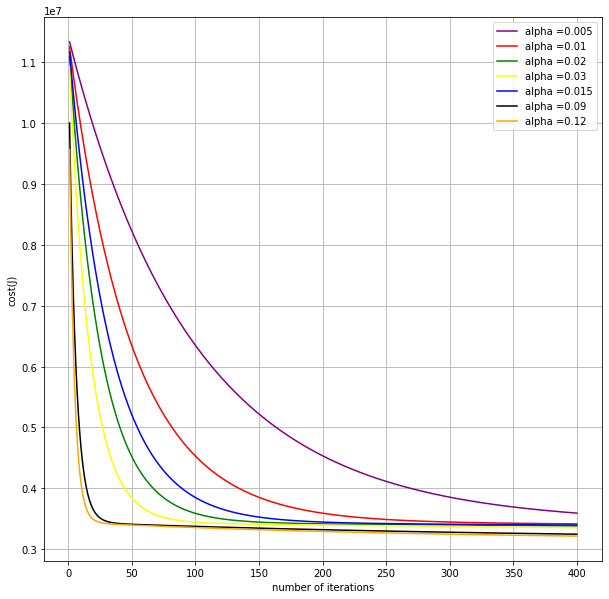

In [21]:
# choosing the best alpha for gradient descent.

iterations = 400;
theta = np.zeros(7)


alpha = 0.005;
theta_1,cost_history_1 = gradient_descent(X, y, theta, alpha, iterations)


alpha = 0.01;
theta_2,cost_history_2 = gradient_descent(X, y, theta, alpha, iterations)


alpha = 0.02;
theta_3,cost_history_3 = gradient_descent(X, y, theta, alpha, iterations)


alpha = 0.03;
theta_4,cost_history_4 = gradient_descent(X, y, theta, alpha, iterations)


alpha = 0.015;
theta_5,cost_history_5 = gradient_descent(X, y,theta, alpha, iterations)


alpha = 0.09;
theta_6,cost_history_6 = gradient_descent(X, y, theta, alpha, iterations)


alpha = 0.12;
theta_7,cost_history_7 = gradient_descent(X, y, theta, alpha, iterations)

plt.plot(range(1, iterations +1),cost_history_1, color= 'purple', label = 'alpha =0.005')
plt.plot(range(1, iterations +1),cost_history_2, color= 'red', label = 'alpha =0.01')
plt.plot(range(1, iterations +1),cost_history_3, color= 'green', label = 'alpha =0.02')
plt.plot(range(1, iterations +1),cost_history_4, color= 'yellow', label = 'alpha =0.03')
plt.plot(range(1, iterations +1),cost_history_5, color= 'blue', label = 'alpha =0.015')
plt.plot(range(1, iterations +1),cost_history_6, color= 'black', label = 'alpha =0.09')
plt.plot(range(1, iterations +1),cost_history_7, color= 'orange', label = 'alpha =0.12')
plt.rcParams["figure.figsize"] = (60,20)
plt.grid()
plt.xlabel("number of iterations")
plt.ylabel("cost(J)")
plt.legend()

In [22]:
# from the above graph the orange graph we can concur that at alpha value = 0.12
# has the least value of cost function with least number of iterations

theta = np.zeros(7)
iterations = 400;
alpha = 0.12;

theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)
print('Final value of theta =\n ', theta)
print('First 5 values from cost_history =', cost_history[:5])
print('Last 5 values from cost_history =', cost_history[-5:])

Final value of theta =
  [ 2777.63126253   638.29156885  2490.22001193  -214.4798669
  -109.36234005 -3028.74076779  1771.70073931]
First 5 values from cost_history = [9562817.04352571 8166442.03664028 7102989.06142671 6287039.48710325
 5657546.36304282]
Last 5 values from cost_history = [3215940.43692455 3215677.66673264 3215415.8348751  3215154.9380012
 3214894.97277219]


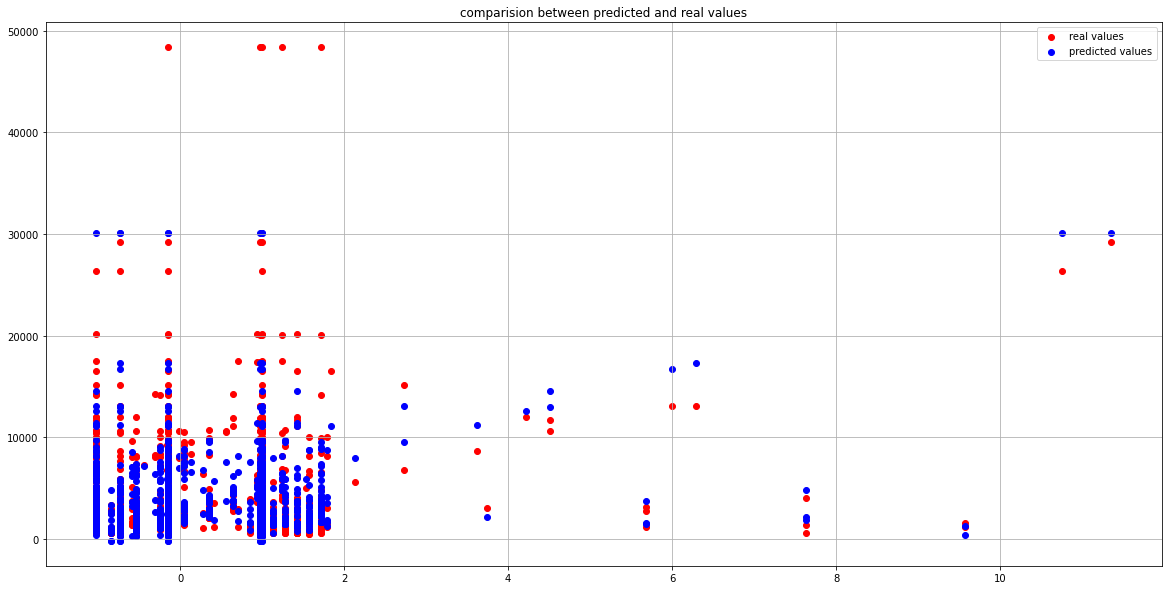

In [25]:
# computing the final hypothesis plot which predicts out total health care cost
hx = X.dot(theta)
# plotting real values 
plt.scatter(X[:,0], y, color='red',label='real values')
plt.scatter(X[:,1], y, color='red')
plt.scatter(X[:,2], y, color='red')
plt.scatter(X[:,3], y, color='red')
plt.scatter(X[:,4], y, color='red')
#plotting predicted values
plt.scatter(X[:,0], hx, color='blue',label='predicted values')
plt.scatter(X[:,1], hx, color='blue')
plt.scatter(X[:,2], hx, color='blue')
plt.scatter(X[:,3], hx, color='blue')
plt.scatter(X[:,4], hx, color='blue')
plt.rcParams["figure.figsize"] = (20,10)
plt.title("comparision between predicted and real values")
plt.grid()
plt.legend()

In [1]:
# accuracy metrics for the above lonear regression model 
# we can see that APRDRG depends in a quadratic manner on totalh health care cost
# APRDRG stands for all patients recent diagnosis grouping ## patients are grouped according to their diagnosis 
# basically represents the condition that they were diagnosed with
# since the condition they are diagnosed with carries a quadratic relation with the total health care cost, 
# it is important to note that there must exist a new feature with the feature must be added to the data frame and treated a s a new feature. 
